## Overview of Data and Cleaning for whole Germany

### Dataset HK_Cities

#### Data cleaning and dropping Columns

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

hk_cities = pd.read_csv('../Data/HK_cities.csv', dtype={'plz': object, 'zimmeranzahl': object, 'click_customer': object})

df = pd.DataFrame(hk_cities)

#All columns sorted by category
time_information = ['adat', 'edat']
object_features = [ 'ausstattung', 'badezimmer', 'denkmalobjekt', 'einbaukueche', 'ferienhaus', 'gaestewc', 'garten', 'haustier_erlaubt', 'kategorie_Haus', 'keller', 'parkplatz', 'zimmeranzahl']
general_object_information = ['bauphase', 'einliegerwohnung', 'foerderung', 'immobilientyp', 'kaufvermietet', 'mieteinnahmenpromonat', 'nebenraeume', 'rollstuhlgerecht', 'schlafzimmer']
area_information = ['grundstuecksflaeche', 'nutzflaeche', 'wohnflaeche']
energy_and_structure_information = ['baujahr', 'energieausweistyp', 'energieeffizienzklasse', 'ev_kennwert', 'ev_wwenthalten', 'heizkosten', 'heizungsart', 'letzte_modernisierung', 'objektzustand']
price_information = ['kaufpreis', 'price_sqm', 'parkplatzpreis']
regional_information = ['gid2019', 'kid2019', 'ergg_1km', 'blid']
meta_information_advertisement = ['click_customer', 'click_schnellkontakte', 'click_url', 'click_weitersagen', 'hits', 'laufzeittage', 'hits_gen']
technical_variables = ['bef1', 'bef2', 'bef3', 'bef4', 'bef5', 'bef6', 'bef7', 'bef8', 'bef9', 'bef10', 'anbieter', 'duplicateid', 'spell', 'click_schnellkontakte_gen', 'click_weitersagen_gen', 'click_url_gen']
other_variables = ['liste_show', 'liste_match', 'liste_show_gen', 'liste_match_gen']

columns_to_drop = object_features + general_object_information + area_information + energy_and_structure_information + regional_information + meta_information_advertisement + technical_variables + other_variables
df.drop(columns=columns_to_drop, axis=1, inplace=True)
print(df.shape)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
(367583, 7)


#### Overview of number of transactions and average price per sqm

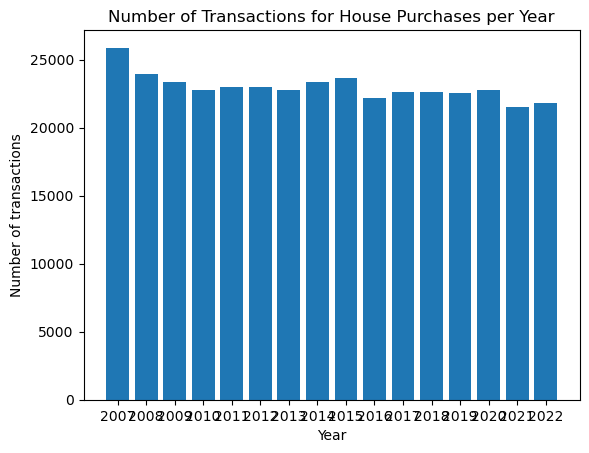

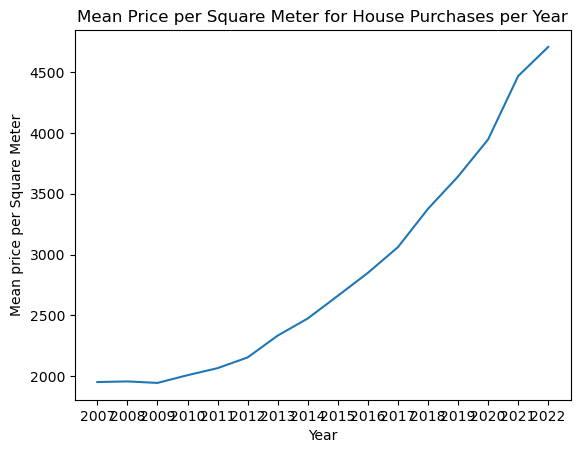

In [2]:
df['adat_year'] = df['adat'].astype(str).str[:4]

number_of_transactions_per_year = df.groupby('adat_year')['price_sqm'].count()
plt.bar(number_of_transactions_per_year.index, number_of_transactions_per_year.values)
plt.xlabel("Year")
plt.ylabel('Number of transactions')
plt.title('Number of Transactions for House Purchases per Year')
plt.show()

average_price_sqm_per_year = df.groupby('adat_year')['price_sqm'].mean()
plt.plot(average_price_sqm_per_year.index, average_price_sqm_per_year.values)
plt.xlabel("Year")
plt.ylabel('Mean price per Square Meter')
plt.title('Mean Price per Square Meter for House Purchases per Year')
plt.show()

#### Map of Germany showing inhabitants per PLZ

/var/folders/5h/0pnj053913z2cl2pgkgr888h0000gp/T/ipykernel_33458/3950415790.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


[Text(0.5, 1.0, 'Germany: Number of Inhabitants per Postal Code'), None, None]

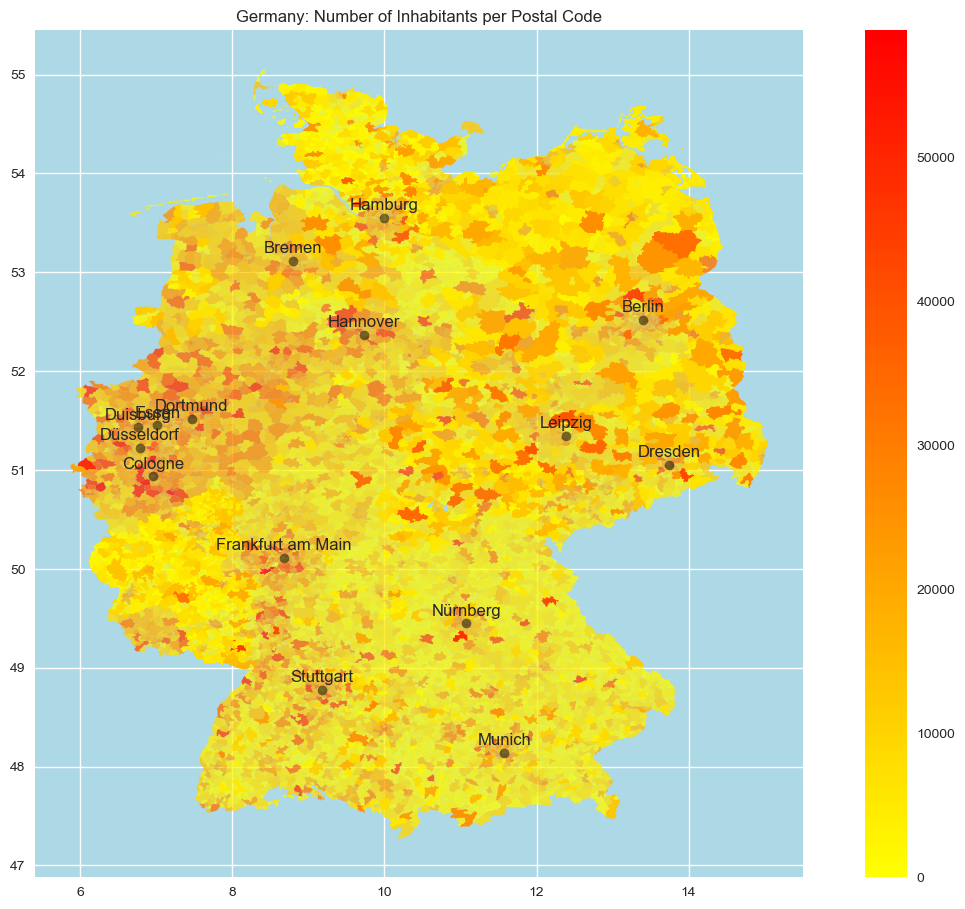

In [3]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

plz_shape_df = gpd.read_file('../Data/PLZ-Gebiete/plz-gebiete.shp', dtype={'plz': str})


plz_region_df = pd.read_csv('../Data/zuordnung_plz_ort.csv', sep=',', dtype={'plz': str})
plz_region_df.drop('osm_id', axis=1, inplace=True)

germany_df = pd.merge(left=plz_shape_df, right=plz_region_df, on='plz',how='inner')
germany_df.drop(['note'], axis=1, inplace=True)

#Number of inhabitants per plz
plz_einwohner_df = pd.read_csv('../Data/plz_einwohner.csv', sep=',', dtype={'plz': str, 'einwohner': int})
germany_plz_einwohner_df = pd.merge(left=germany_df, right=plz_einwohner_df, on='plz', how='left')

plt.rcParams['figure.figsize'] = [16, 11]

top_cities = {
    'Hamburg': (9.993682, 53.551086),
    'Hannover': (9.73322, 52.37052),
    'Bremen': (8.7975, 53.1153),
    'Düsseldorf': (6.782048, 51.227144),
    'Essen': (7.0131, 51.4508),
    'Duisburg': (6.7611, 51.4322),
    'Cologne': (6.953101, 50.935173),
    'Dortmund': (7.468554, 51.513400),
    'Frankfurt am Main': (8.682127, 50.110924),
    'Stuttgart': (9.181332, 48.777128),
    'Munich': (11.576124, 48.137154),
    'Nürnberg': (11.077438, 49.449820),
    'Berlin': (13.404954, 52.520008),
    'Dresden': (13.7400, 51.0500),
    'Leipzig': (12.387772, 51.343479), 
}

fig, ax = plt.subplots()

germany_plz_einwohner_df.plot(ax=ax, column='einwohner', categorical=False, legend=True, cmap='autumn_r', alpha=0.8)

for c in top_cities.keys():
    ax.text(
        x=top_cities[c][0],
        y=top_cities[c][1] + 0.08,
        s=c,
        fontsize=12,
        ha='center',
    )

    ax.plot(
        top_cities[c][0],
        top_cities[c][1],
        marker='o',
        c='black',
        alpha=0.5
    )

ax.set(
    title='Germany: Number of Inhabitants per Postal Code',
    aspect=1.3,
    facecolor='lightblue'
)

#### Map of Germany number of transactions per PLZ

Index(['plz', 'geometry', 'ags', 'ort', 'landkreis', 'bundesland',
       'transactions'],
      dtype='object')
357386.0


[Text(0.5, 1.0, 'Germany: Number of transactions per PLZ'), None, None]

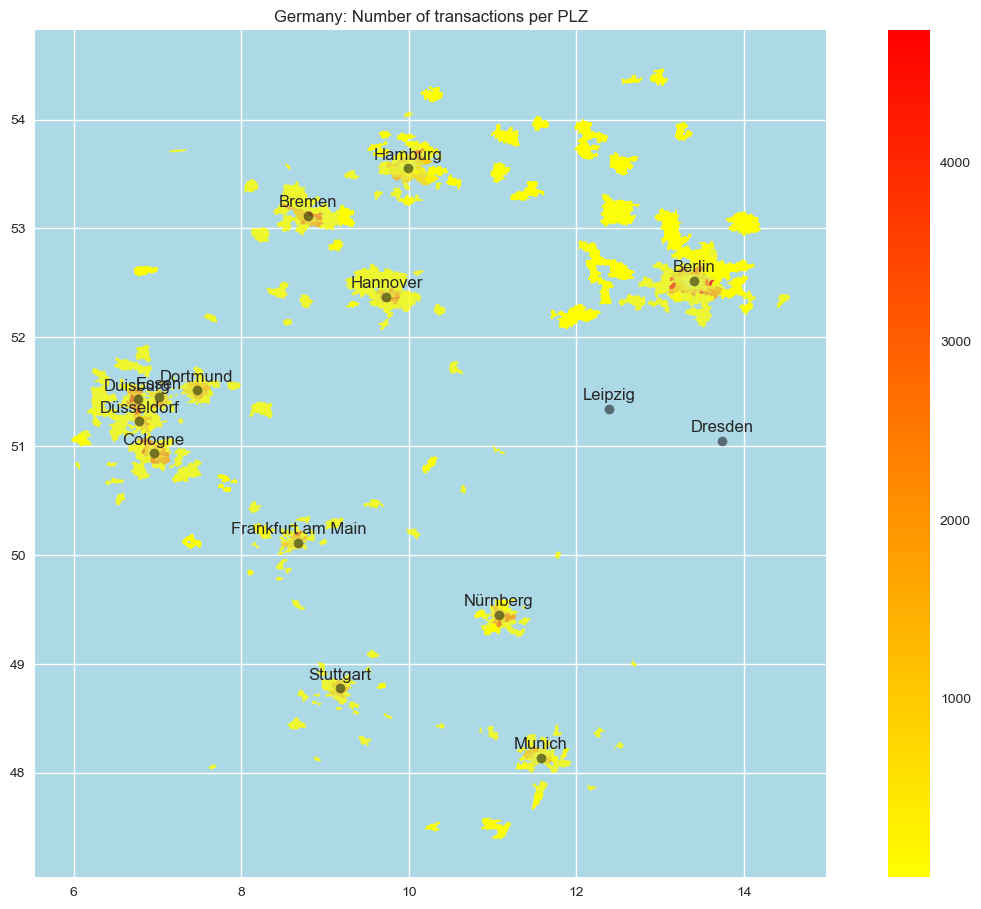

In [4]:
df_germany = df.groupby(['plz'])['plz'].count().reset_index(name='transactions')
germany_number_of_transactions_per_plz_df = pd.merge(left=germany_df, right=df_germany, on='plz', how='left')
print(germany_number_of_transactions_per_plz_df.columns)
total = germany_number_of_transactions_per_plz_df['transactions'].sum()
print(total)

fig, ax = plt.subplots()

germany_number_of_transactions_per_plz_df.plot(ax=ax, column='transactions', categorical=False, legend=True, cmap='autumn_r', alpha=0.8)

for c in top_cities.keys():
    ax.text(
        x=top_cities[c][0],
        y=top_cities[c][1] + 0.08,
        s=c,
        fontsize=12,
        ha='center',
    )

    ax.plot(
        top_cities[c][0],
        top_cities[c][1],
        marker='o',
        c='black',
        alpha=0.5
    )
    
ax.set(
    title='Germany: Number of transactions per PLZ',
    aspect=1.3,
    facecolor='lightblue'
) 

#### Number of transactions diagramm sorted by cities

331614
39908
371522
                  ort  transactions
0              Berlin         79313
1             Hamburg         31927
2              Bremen         31747
3                Köln         31468
4            Duisburg         31263
5               Essen         15909
6   Frankfurt am Main         15899
7          Düsseldorf         15806
8            Nürnberg         15785
9           Stuttgart         15749
10           Dortmund         15722
11           Hannover         15543
12            München         15483
13       Other cities         39908


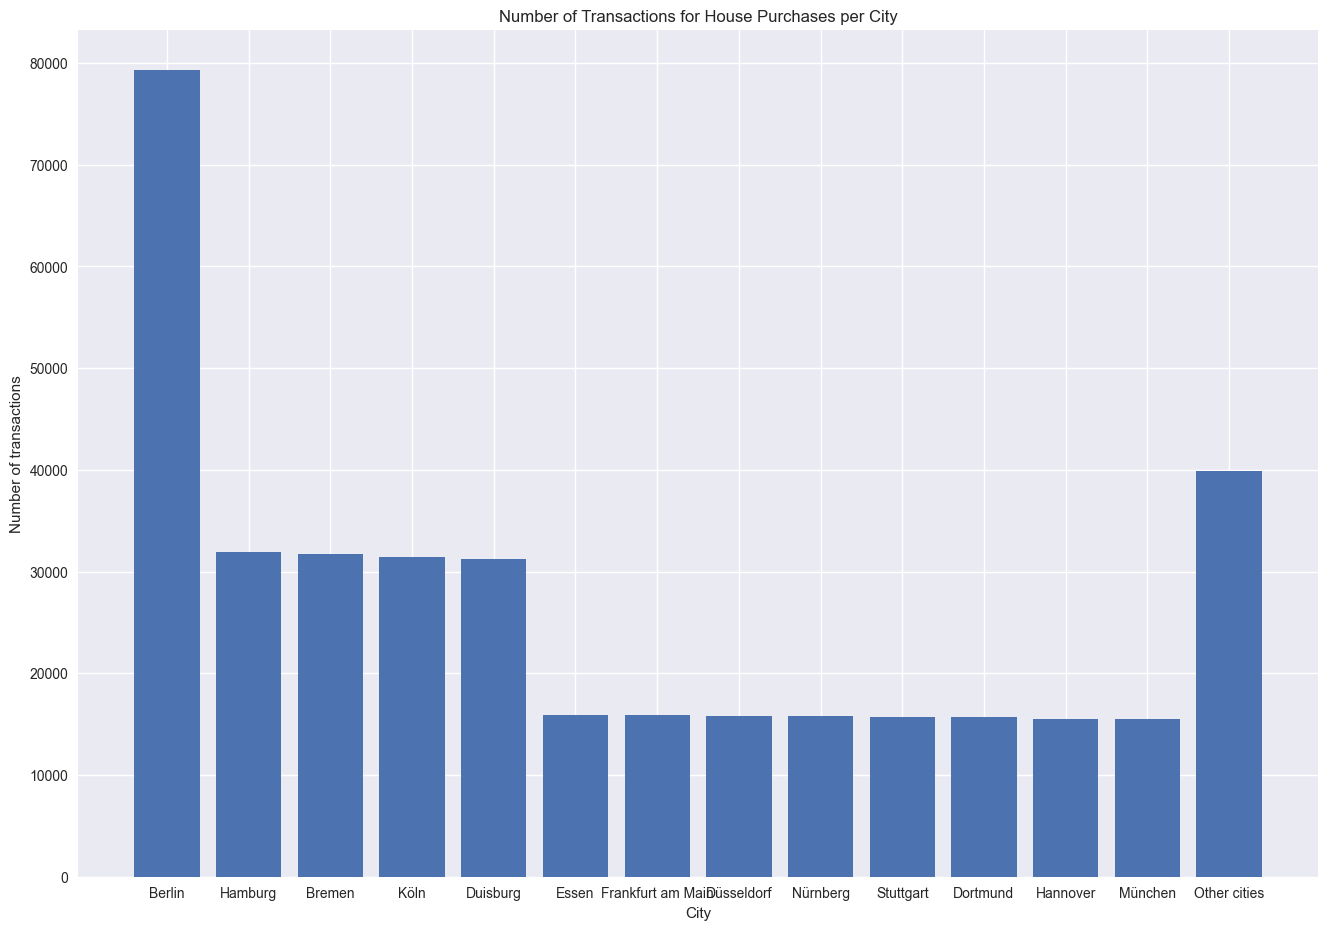

In [ ]:
plz_city = pd.read_csv('./Data/zuordnung_plz_ort.csv', dtype={'plz': object})
plz_city.drop('osm_id', axis=1, inplace=True)
df_plz_city = pd.DataFrame(plz_city)

df_data_and_city = pd.merge(df, df_plz_city, how="left", on="plz")

big_cities = ['Hamburg', 'Hannover', 'Bremen', 'Düsseldorf', 'Essen', 'Duisburg', 'Köln', 'Dortmund', 'Frankfurt am Main', 'Stuttgart', 'München', 'Nürnberg', 'Berlin', 'Dresden', 'Leizig']
df_big_cities = df_data_and_city[df_data_and_city['ort'].isin(big_cities)]
df_not_big_cities = df_data_and_city[~df_data_and_city['ort'].isin(big_cities)]
number_of_transaction_not_big_cities = df_not_big_cities['obid'].count()

number_of_transactions_big_cities = df_big_cities['obid'].count()
print(number_of_transactions_big_cities)
print(number_of_transaction_not_big_cities)
print(number_of_transaction_not_big_cities + number_of_transactions_big_cities)

count_by_ort = df_big_cities.groupby('ort')['obid'].count().sort_values(ascending=False).reset_index(name='transactions')
new_row = {'ort': 'Other cities', 'transactions': number_of_transaction_not_big_cities}
count_by_ort.loc[len(count_by_ort)] = new_row
print(count_by_ort)

plt.bar(count_by_ort['ort'], count_by_ort['transactions'])
plt.xlabel("City")
plt.ylabel('Number of transactions')
plt.title('Number of Transactions for House Purchases per City')
plt.show()
